In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

In [3]:
adadelta=pd.read_csv('training_results_ADADELTA.csv')
adagrad=pd.read_csv('training_results_ADAGRAD.csv')
adam=pd.read_csv('training_results_ADAM.csv')
adamax=pd.read_csv('training_results_ADAMAX.csv')
asgd=pd.read_csv('training_results_ASGD.csv')
lbfgs=pd.read_csv('training_results_LBFGS.csv')
momentum=pd.read_csv('training_results_MOMENTUM(0.9).csv')
nadam=pd.read_csv('training_results_NADAM.csv')
rmsprop=pd.read_csv('training_results_RMSPROP.csv')
rprop=pd.read_csv('training_results_RPROP.csv')
sgd=pd.read_csv('training_results_SGD.csv')

In [4]:
# Define the optimizers_data dictionary
optimizers_data = {
    'ADADELTA': adadelta,
    'ADAGRAD': adagrad,
    'ADAM': adam,
    'ADAMAX': adamax,
    'ASGD': asgd,
    'LBFGS': lbfgs,
    'MOMENTUM': momentum,
    'NADAM': nadam,
    'RMSPROP': rmsprop,
    'RPROP': rprop,
    'SGD': sgd
}

optimizers_data

{'ADADELTA':       Batch  Episode   PTO Damping    Reward  Training Loss  Validation Loss
 0         0        0  1.896552e+06  0.000000       7.661373        14.923682
 1         0        1  1.000000e+06  0.707726      13.787034         3.166393
 2         0        2  1.724138e+06  0.552479       6.150092         6.190107
 3         0        3  1.000000e+06  0.691177       3.874322         2.049308
 4         0        4  1.482759e+06  0.205747       3.167641         1.304566
 ...     ...      ...           ...       ...            ...              ...
 1595     39     1595  2.000000e+06  0.435215       4.150632         3.138626
 1596     39     1596  2.000000e+06  0.435373       3.502724         9.876069
 1597     39     1597  2.000000e+06  0.435532       4.016870         2.700115
 1598     39     1598  2.000000e+06  0.435690       2.592736         2.131743
 1599     39     1599  2.000000e+06  0.435848       1.520618         4.133683
 
 [1600 rows x 6 columns],
 'ADAGRAD':       Batch 

### Descriptive Statistics

In [5]:
def generate_descriptive_statistics_table(dataframes):
    stats = []

    for name, df in dataframes.items():
        stats.append({
            'Optimizer': name,
            'Reward Mean': df['Reward'].mean(),
            'Reward Std': df['Reward'].std(),
            'Reward Min': df['Reward'].min(),
            'Reward Max': df['Reward'].max(),
            'Training Loss Mean': df['Training Loss'].mean(),
            'Training Loss Std': df['Training Loss'].std(),
            'Training Loss Min': df['Training Loss'].min(),
            'Training Loss Max': df['Training Loss'].max(),
            'Validation Loss Mean': df['Validation Loss'].mean(),
            'Validation Loss Std': df['Validation Loss'].std(),
            'Validation Loss Min': df['Validation Loss'].min(),
            'Validation Loss Max': df['Validation Loss'].max()
        })

    # Convert the stats list into a DataFrame for neat tabular display
    stats_df = pd.DataFrame(stats)
    return stats_df

# Generate the statistics table
stats_table = generate_descriptive_statistics_table(optimizers_data)

# Display the table
print(stats_table.to_string(index=False))

Optimizer  Reward Mean  Reward Std  Reward Min  Reward Max  Training Loss Mean  Training Loss Std  Training Loss Min  Training Loss Max  Validation Loss Mean  Validation Loss Std  Validation Loss Min  Validation Loss Max
 ADADELTA     1.043373    1.212702         0.0    6.895454            5.628092           6.633020           0.017031          68.543015              5.678259             6.887923         5.813715e-02            76.450439
  ADAGRAD     0.797020    0.918583         0.0    9.011965            1.140150           2.744308           0.000304          56.151184              1.079016             2.640470         2.792537e-03            63.416260
     ADAM     0.820097    1.089652         0.0    4.909780            1.278852           3.082490           0.000006          20.265268              1.256349             3.052088         7.678431e-06            20.079016
   ADAMAX     0.877082    1.165231         0.0    6.977464            1.605038           4.378999           0.000862

## Visual Analysis

In [6]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Assuming 'optimizers_data' is a dictionary of DataFrames for each optimizer
# num_optimizers = len(optimizers_data)
# fig, axs = plt.subplots(3, num_optimizers, figsize=(num_optimizers*4, 12), constrained_layout=True)

# for idx, (name, df) in enumerate(optimizers_data.items()):
#     # Rewards Box Plot
#     sns.boxplot(data=df, y='Reward', ax=axs[0, idx])
#     axs[0, idx].set_title(f'{name} Rewards')
#     axs[0, idx].set_ylabel('Rewards')
#     axs[0, idx].set_xlabel('')

#     # Training Loss Box Plot
#     sns.boxplot(data=df, y='Training Loss', ax=axs[1, idx])
#     axs[1, idx].set_title(f'{name} Training Loss')
#     axs[1, idx].set_ylabel('Training Loss')
#     axs[1, idx].set_xlabel('')

#     # Validation Loss Box Plot
#     sns.boxplot(data=df, y='Validation Loss', ax=axs[2, idx])
#     axs[2, idx].set_title(f'{name} Validation Loss')
#     axs[2, idx].set_ylabel('Validation Loss')
#     axs[2, idx].set_xlabel(name)

# # Adjusting layout for readability
# plt.tight_layout()
# plt.show()

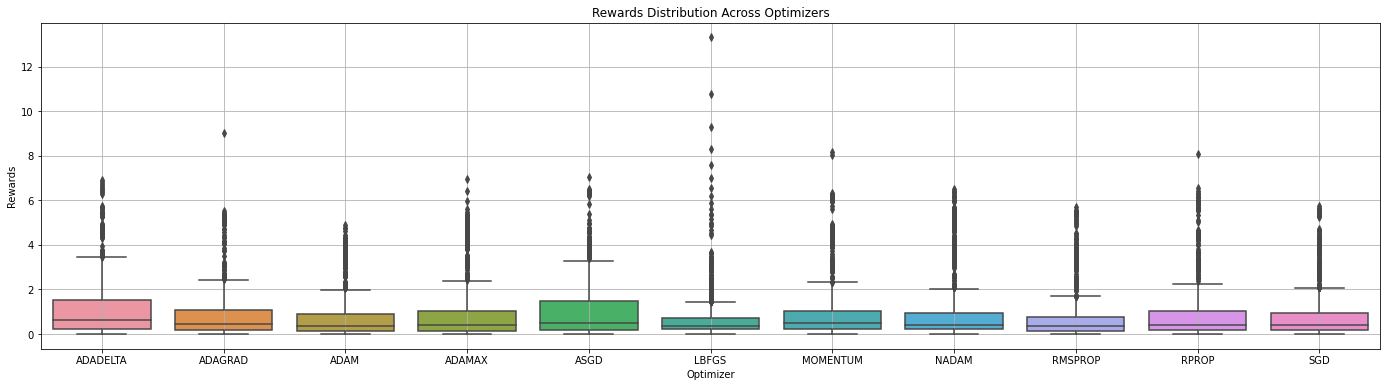

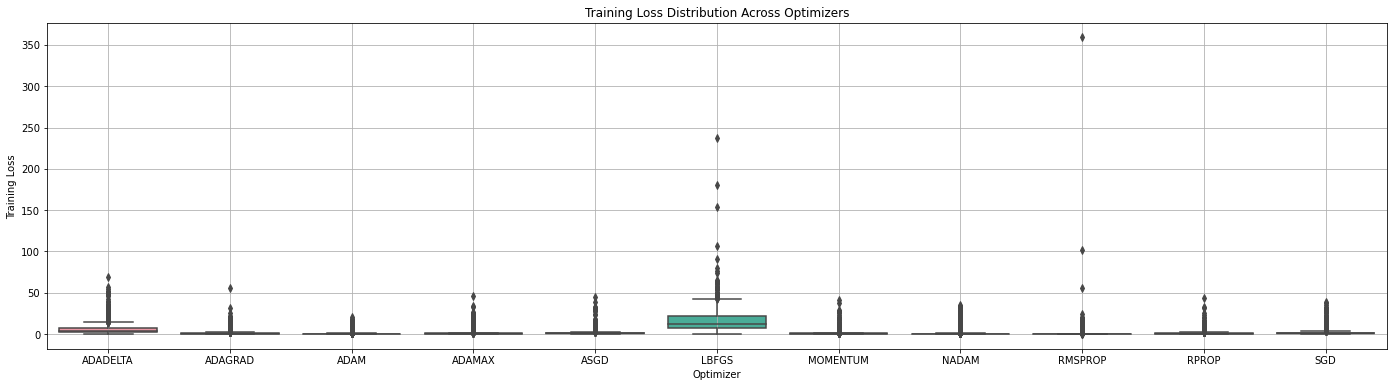

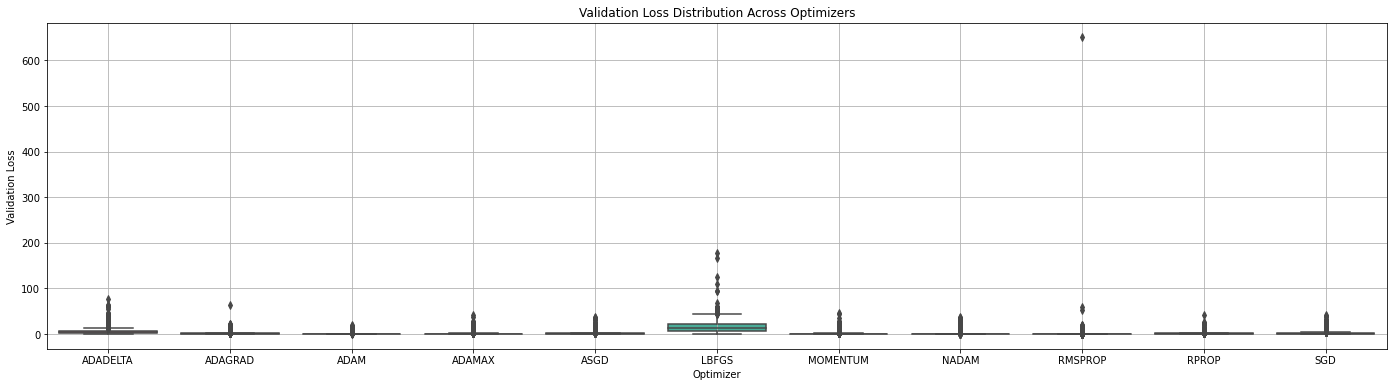

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'optimizers_data' is a dictionary of DataFrames for each optimizer
all_rewards = []
all_training_losses = []
all_validation_losses = []
optimizer_names = []

# Consolidate data for plotting
for name, df in optimizers_data.items():
    for _, row in df.iterrows():
        all_rewards.append((name, row['Reward']))
        all_training_losses.append((name, row['Training Loss']))
        all_validation_losses.append((name, row['Validation Loss']))
    optimizer_names.append(name)

# Convert lists to DataFrames for Seaborn plotting
df_rewards = pd.DataFrame(all_rewards, columns=['Optimizer', 'Reward'])
df_training_losses = pd.DataFrame(all_training_losses, columns=['Optimizer', 'Training Loss'])
df_validation_losses = pd.DataFrame(all_validation_losses, columns=['Optimizer', 'Validation Loss'])

# Rewards Box Plot
plt.figure(figsize=(24, 6))
sns.boxplot(data=df_rewards, x='Optimizer', y='Reward')
plt.title('Rewards Distribution Across Optimizers')
plt.ylabel('Rewards')
plt.xlabel('Optimizer')
plt.grid(True)
plt.show()

# Training Loss Box Plot
plt.figure(figsize=(24, 6))
sns.boxplot(data=df_training_losses, x='Optimizer', y='Training Loss')
plt.title('Training Loss Distribution Across Optimizers')
plt.ylabel('Training Loss')
plt.xlabel('Optimizer')
plt.grid(True)
plt.show()

# Validation Loss Box Plot
plt.figure(figsize=(24, 6))
sns.boxplot(data=df_validation_losses, x='Optimizer', y='Validation Loss')
plt.title('Validation Loss Distribution Across Optimizers')
plt.ylabel('Validation Loss')
plt.xlabel('Optimizer')
plt.grid(True)
plt.show()

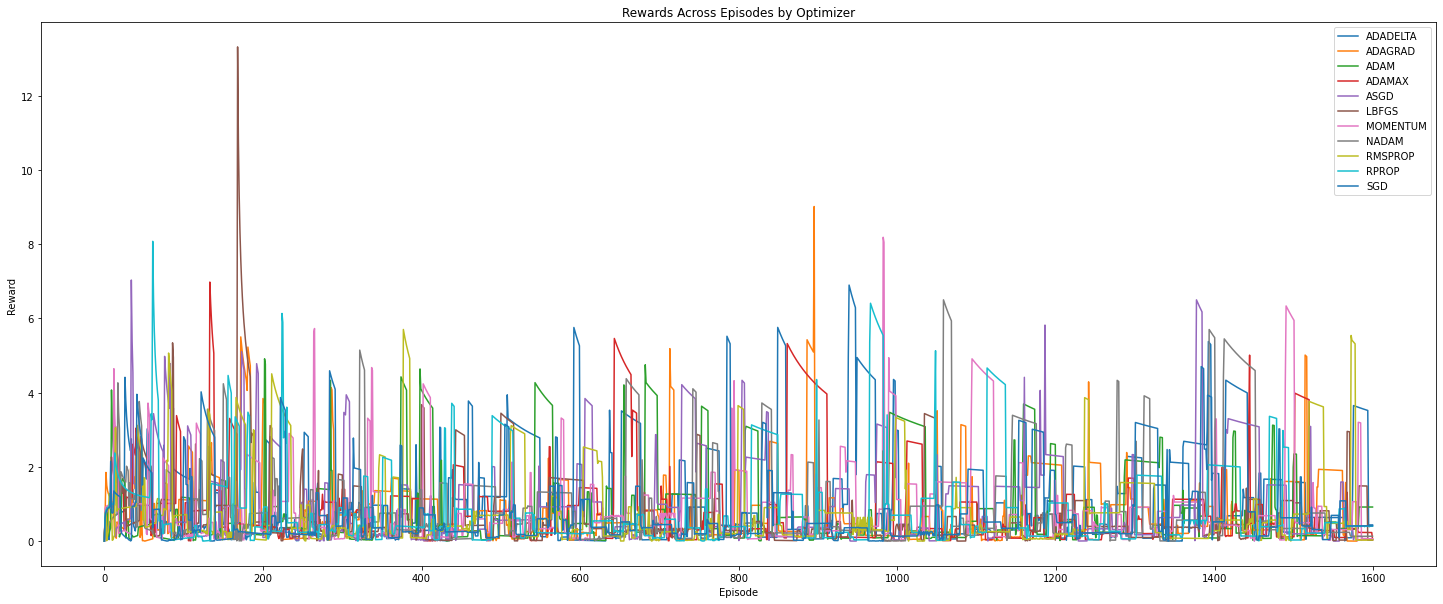

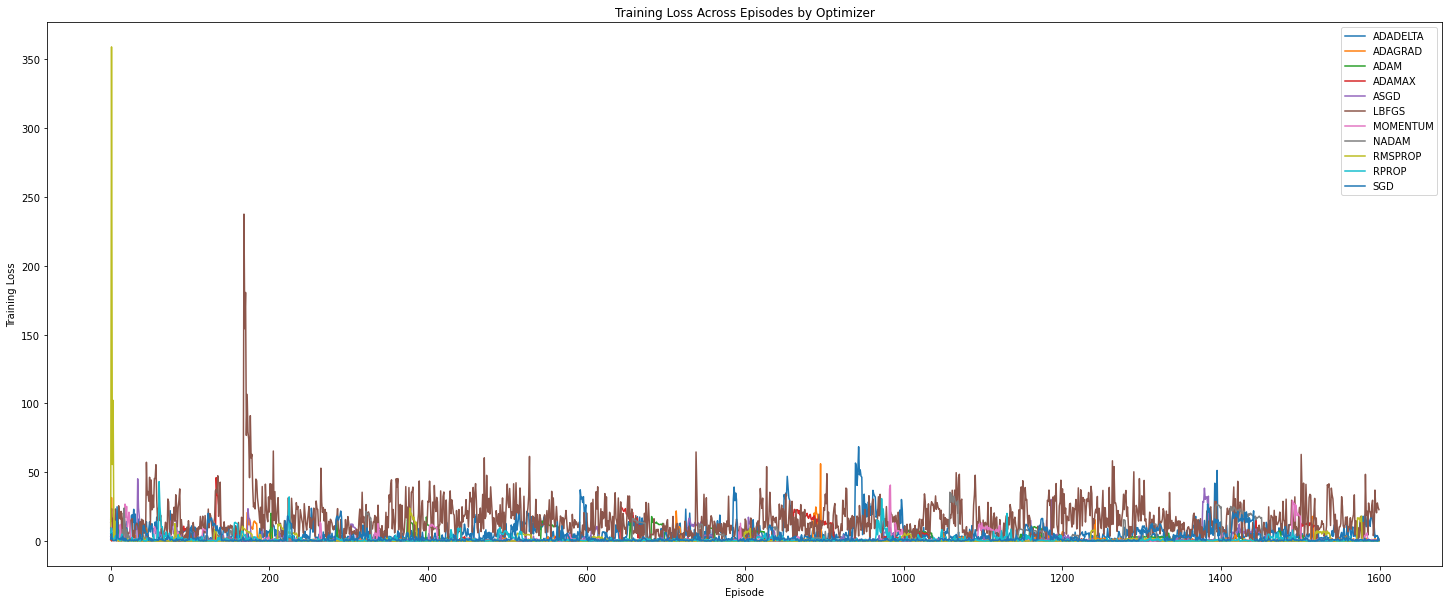

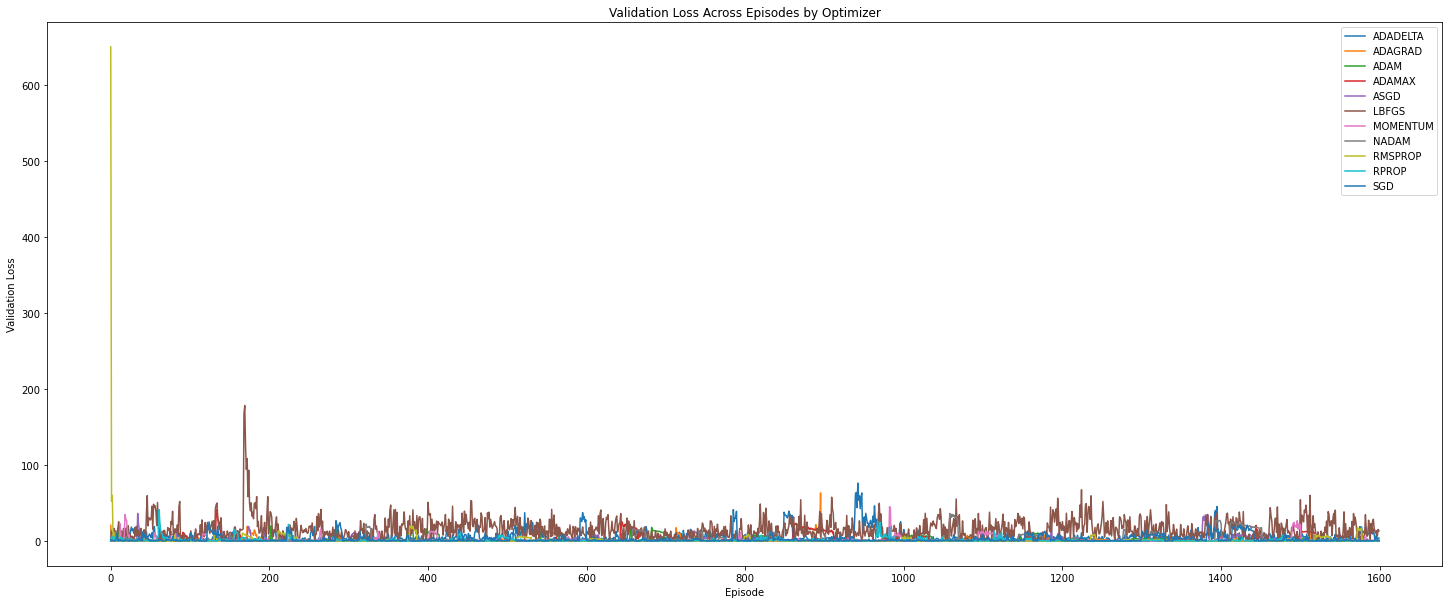

In [94]:
# Line plot for rewards
plt.figure(figsize=(25, 10))
for name, df in optimizers_data.items():
    sns.lineplot(data=df, x='Episode', y='Reward', label=name)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Rewards Across Episodes by Optimizer')
plt.legend()
plt.show()

# Line plot for training losses
plt.figure(figsize=(25, 10))
for name, df in optimizers_data.items():
    sns.lineplot(data=df, x='Episode', y='Training Loss', label=name)
plt.xlabel('Episode')
plt.ylabel('Training Loss')
plt.title('Training Loss Across Episodes by Optimizer')
plt.legend()
plt.show()

# Line plot for validation losses
plt.figure(figsize=(25, 10))
for name, df in optimizers_data.items():
    sns.lineplot(data=df, x='Episode', y='Validation Loss', label=name)
plt.xlabel('Episode')
plt.ylabel('Validation Loss')
plt.title('Validation Loss Across Episodes by Optimizer')
plt.legend()
plt.show()

## Hypothesis Testing

In [9]:
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Conducting ANOVA
anova_results_rewards = stats.f_oneway(df_rewards[df_rewards['Optimizer'] == 'ADADELTA']['Reward'],
                               df_rewards[df_rewards['Optimizer'] == 'ADAGRAD']['Reward'],
                               df_rewards[df_rewards['Optimizer'] == 'ADAM']['Reward'],
                               df_rewards[df_rewards['Optimizer'] == 'ADAMAX']['Reward'],
                               df_rewards[df_rewards['Optimizer'] == 'ASGD']['Reward'],
                               df_rewards[df_rewards['Optimizer'] == 'LBFGS']['Reward'],
                               df_rewards[df_rewards['Optimizer'] == 'MOMENTUM']['Reward'],
                               df_rewards[df_rewards['Optimizer'] == 'NADAM']['Reward'],
                               df_rewards[df_rewards['Optimizer'] == 'RMSPROP']['Reward'],
                               df_rewards[df_rewards['Optimizer'] == 'RPROP']['Reward'],
                               df_rewards[df_rewards['Optimizer'] == 'SGD']['Reward'],
                               )
print(f"ANOVA results: F={anova_results_rewards.statistic}, p={anova_results_rewards.pvalue}")

# If ANOVA shows significant results, conduct Tukey's HSD
if anova_results_rewards.pvalue < 0.05:
    tukey_results_rewards = pairwise_tukeyhsd(endog=df_rewards['Reward'], groups=df_rewards['Optimizer'], alpha=0.05)
    print(tukey_results_rewards)

ANOVA results: F=14.897082696592374, p=8.038263539674114e-27
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
ADADELTA  ADAGRAD  -0.2464    0.0 -0.3725 -0.1202   True
ADADELTA     ADAM  -0.2233    0.0 -0.3495 -0.0971   True
ADADELTA   ADAMAX  -0.1663 0.0011 -0.2925 -0.0401   True
ADADELTA     ASGD  -0.0687 0.8084 -0.1948  0.0575  False
ADADELTA    LBFGS  -0.3845    0.0 -0.5106 -0.2583   True
ADADELTA MOMENTUM  -0.1791 0.0003 -0.3053 -0.0529   True
ADADELTA    NADAM  -0.1004  0.269 -0.2266  0.0258  False
ADADELTA  RMSPROP   -0.302    0.0 -0.4282 -0.1758   True
ADADELTA    RPROP  -0.1652 0.0013 -0.2914 -0.0391   True
ADADELTA      SGD  -0.1919 0.0001 -0.3181 -0.0657   True
 ADAGRAD     ADAM   0.0231    1.0 -0.1031  0.1493  False
 ADAGRAD   ADAMAX   0.0801 0.6187 -0.0461  0.2062  False
 ADAGRAD     ASGD   0.1777 0.0003  0.0515  0.3039   True
 ADAGRAD    LBFGS  -0.1381 

In [10]:
# Conducting ANOVA
anova_results_training_losses = stats.f_oneway(df_training_losses[df_training_losses['Optimizer'] == 'ADADELTA']['Training Loss'],
                               df_training_losses[df_training_losses['Optimizer'] == 'ADAGRAD']['Training Loss'],
                               df_training_losses[df_training_losses['Optimizer'] == 'ADAM']['Training Loss'],
                               df_training_losses[df_training_losses['Optimizer'] == 'ADAMAX']['Training Loss'],
                               df_training_losses[df_training_losses['Optimizer'] == 'ASGD']['Training Loss'],
                               df_training_losses[df_training_losses['Optimizer'] == 'LBFGS']['Training Loss'],
                               df_training_losses[df_training_losses['Optimizer'] == 'MOMENTUM']['Training Loss'],
                               df_training_losses[df_training_losses['Optimizer'] == 'NADAM']['Training Loss'],
                               df_training_losses[df_training_losses['Optimizer'] == 'RMSPROP']['Training Loss'],
                               df_training_losses[df_training_losses['Optimizer'] == 'RPROP']['Training Loss'],
                               df_training_losses[df_training_losses['Optimizer'] == 'SGD']['Training Loss'],
                               )
print(f"ANOVA results: F={anova_results_training_losses.statistic}, p={anova_results_training_losses.pvalue}")

# If ANOVA shows significant results, conduct Tukey's HSD
if anova_results_training_losses.pvalue < 0.05:
    tukey_results_training_losses = pairwise_tukeyhsd(endog=df_training_losses['Training Loss'], groups=df_training_losses['Optimizer'], alpha=0.05)
    print(tukey_results_training_losses)

ANOVA results: F=744.046428398169, p=0.0
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
ADADELTA  ADAGRAD  -4.4879    0.0  -5.2176  -3.7583   True
ADADELTA     ADAM  -4.3492    0.0  -5.0789  -3.6196   True
ADADELTA   ADAMAX  -4.0231    0.0  -4.7527  -3.2934   True
ADADELTA     ASGD  -3.8507    0.0  -4.5804   -3.121   True
ADADELTA    LBFGS  10.1244    0.0   9.3947  10.8541   True
ADADELTA MOMENTUM  -4.5274    0.0  -5.2571  -3.7977   True
ADADELTA    NADAM  -3.7964    0.0  -4.5261  -3.0667   True
ADADELTA  RMSPROP   -4.494    0.0  -5.2237  -3.7643   True
ADADELTA    RPROP  -4.4014    0.0  -5.1311  -3.6717   True
ADADELTA      SGD  -3.3023    0.0   -4.032  -2.5726   True
 ADAGRAD     ADAM   0.1387 0.9999   -0.591   0.8684  False
 ADAGRAD   ADAMAX   0.4649 0.6128  -0.2648   1.1946  False
 ADAGRAD     ASGD   0.6372 0.1537  -0.0925   1.3669  False
 ADAGRAD    LBF

In [11]:
# Conducting ANOVA
anova_results_validation_losses = stats.f_oneway(df_validation_losses[df_validation_losses['Optimizer'] == 'ADADELTA']['Validation Loss'],
                               df_validation_losses[df_validation_losses['Optimizer'] == 'ADAGRAD']['Validation Loss'],
                               df_validation_losses[df_validation_losses['Optimizer'] == 'ADAM']['Validation Loss'],
                               df_validation_losses[df_validation_losses['Optimizer'] == 'ADAMAX']['Validation Loss'],
                               df_validation_losses[df_validation_losses['Optimizer'] == 'ASGD']['Validation Loss'],
                               df_validation_losses[df_validation_losses['Optimizer'] == 'LBFGS']['Validation Loss'],
                               df_validation_losses[df_validation_losses['Optimizer'] == 'MOMENTUM']['Validation Loss'],
                               df_validation_losses[df_validation_losses['Optimizer'] == 'NADAM']['Validation Loss'],
                               df_validation_losses[df_validation_losses['Optimizer'] == 'RMSPROP']['Validation Loss'],
                               df_validation_losses[df_validation_losses['Optimizer'] == 'RPROP']['Validation Loss'],
                               df_validation_losses[df_validation_losses['Optimizer'] == 'SGD']['Validation Loss'],
                               )
print(f"ANOVA results: F={anova_results_validation_losses.statistic}, p={anova_results_validation_losses.pvalue}")

# If ANOVA shows significant results, conduct Tukey's HSD
if anova_results_validation_losses.pvalue < 0.05:
    tukey_results_validation_losses = pairwise_tukeyhsd(endog=df_validation_losses['Validation Loss'], groups=df_validation_losses['Optimizer'], alpha=0.05)
    print(tukey_results_validation_losses)

ANOVA results: F=557.5000401680347, p=0.0
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
ADADELTA  ADAGRAD  -4.5992    0.0  -5.4496  -3.7489   True
ADADELTA     ADAM  -4.4219    0.0  -5.2723  -3.5715   True
ADADELTA   ADAMAX  -4.0887    0.0  -4.9391  -3.2383   True
ADADELTA     ASGD  -3.9378    0.0  -4.7882  -3.0875   True
ADADELTA    LBFGS  10.1852    0.0   9.3348  11.0356   True
ADADELTA MOMENTUM  -4.5766    0.0   -5.427  -3.7262   True
ADADELTA    NADAM  -3.8623    0.0  -4.7127  -3.0119   True
ADADELTA  RMSPROP  -4.4245    0.0  -5.2749  -3.5741   True
ADADELTA    RPROP  -4.5126    0.0   -5.363  -3.6623   True
ADADELTA      SGD  -3.3659    0.0  -4.2163  -2.5155   True
 ADAGRAD     ADAM   0.1773 0.9999  -0.6731   1.0277  False
 ADAGRAD   ADAMAX   0.5105 0.6957  -0.3398   1.3609  False
 ADAGRAD     ASGD   0.6614 0.3021   -0.189   1.5118  False
 ADAGRAD    LB

In [12]:
# df_rewards['Optimizer'].unique()
df_training_losses

,Optimizer,Training Loss
0,ADADELTA,7.661373
1,ADADELTA,13.787034
2,ADADELTA,6.150092
3,ADADELTA,3.874322
4,ADADELTA,3.167641
...,...,...
17595,SGD,0.374278
17596,SGD,0.399204
17597,SGD,0.060639
17598,SGD,2.621458


In [13]:
df_rewards

,Optimizer,Reward
0,ADADELTA,0.000000
1,ADADELTA,0.707726
2,ADADELTA,0.552479
3,ADADELTA,0.691177
4,ADADELTA,0.205747
...,...,...
17595,SGD,0.411597
17596,SGD,0.411763
17597,SGD,0.411928
17598,SGD,0.412093


## Correlation Analysis

In [15]:
import pandas as pd
from scipy.stats import pearsonr

# Assuming 'data' is a DataFrame containing your data
x = df_training_losses['Training Loss']
y = df_validation_losses['Validation Loss']

# Calculate Pearson's correlation coefficient
corr_coefficient, p_value = pearsonr(x, y)

print(f"Pearson's Correlation Coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

Pearson's Correlation Coefficient: 0.6406191543842686
P-value: 0.0


In [ ]:
optimizers_data

In [17]:
df_training_losses

,Optimizer,Training Loss
0,ADADELTA,7.661373
1,ADADELTA,13.787034
2,ADADELTA,6.150092
3,ADADELTA,3.874322
4,ADADELTA,3.167641
...,...,...
17595,SGD,0.374278
17596,SGD,0.399204
17597,SGD,0.060639
17598,SGD,2.621458


In [22]:
df_validation_losses

,Optimizer,Validation Loss
0,ADADELTA,14.923682
1,ADADELTA,3.166393
2,ADADELTA,6.190107
3,ADADELTA,2.049308
4,ADADELTA,1.304566
...,...,...
17595,SGD,0.888951
17596,SGD,1.486719
17597,SGD,0.360424
17598,SGD,0.332994


In [52]:
combined_df = pd.concat(
    [df.assign(Optimizer=name) for name, df in optimizers_data.items()],
    ignore_index=True
)

combined_df

,Batch,Episode,PTO Damping,Reward,Training Loss,Validation Loss,Optimizer
0,0,0,1.896552e+06,0.000000,7.661373,14.923682,ADADELTA
1,0,1,1.000000e+06,0.707726,13.787034,3.166393,ADADELTA
2,0,2,1.724138e+06,0.552479,6.150092,6.190107,ADADELTA
3,0,3,1.000000e+06,0.691177,3.874322,2.049308,ADADELTA
4,0,4,1.482759e+06,0.205747,3.167641,1.304566,ADADELTA
...,...,...,...,...,...,...,...
17595,39,1595,1.827586e+06,0.411597,0.374278,0.888951,SGD
17596,39,1596,1.827586e+06,0.411763,0.399204,1.486719,SGD
17597,39,1597,1.827586e+06,0.411928,0.060639,0.360424,SGD
17598,39,1598,1.827586e+06,0.412093,2.621458,0.332994,SGD


In [28]:
# Overall correlation
overall_corr = combined_df[["Training Loss", "Validation Loss"]].corr()

# Correlation by optimizer
corr_by_optimizer = combined_df.groupby("Optimizer").apply(
    lambda group: group[["Training Loss", "Validation Loss"]].corr()
)

In [29]:
corr_by_optimizer

Training Loss  Validation Loss
Optimizer                                                
ADADELTA  Training Loss         1.000000         0.802346
          Validation Loss       0.802346         1.000000
ADAGRAD   Training Loss         1.000000         0.861495
          Validation Loss       0.861495         1.000000
ADAM      Training Loss         1.000000         0.990089
          Validation Loss       0.990089         1.000000
ADAMAX    Training Loss         1.000000         0.986087
          Validation Loss       0.986087         1.000000
ASGD      Training Loss         1.000000         0.947739
          Validation Loss       0.947739         1.000000
LBFGS     Training Loss         1.000000         0.541817
          Validation Loss       0.541817         1.000000
MOMENTUM  Training Loss         1.000000         0.950771
          Validation Loss       0.950771         1.000000
NADAM     Training Loss         1.000000         0.984086
          Validation Loss       0.984086         1.000000
RMSPROP   Training Loss         1.000000         0.142333
          Validation Loss       0.142333         1.000000
RPROP     Training Loss         1.000000         0.753740
          Validation Loss       0.753740         1.000000
SGD       Training Loss         1.000000         0.921576
          Validation Loss       0.921576         1.000000

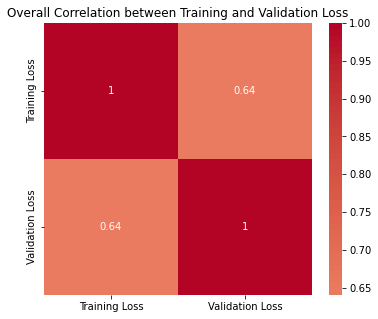

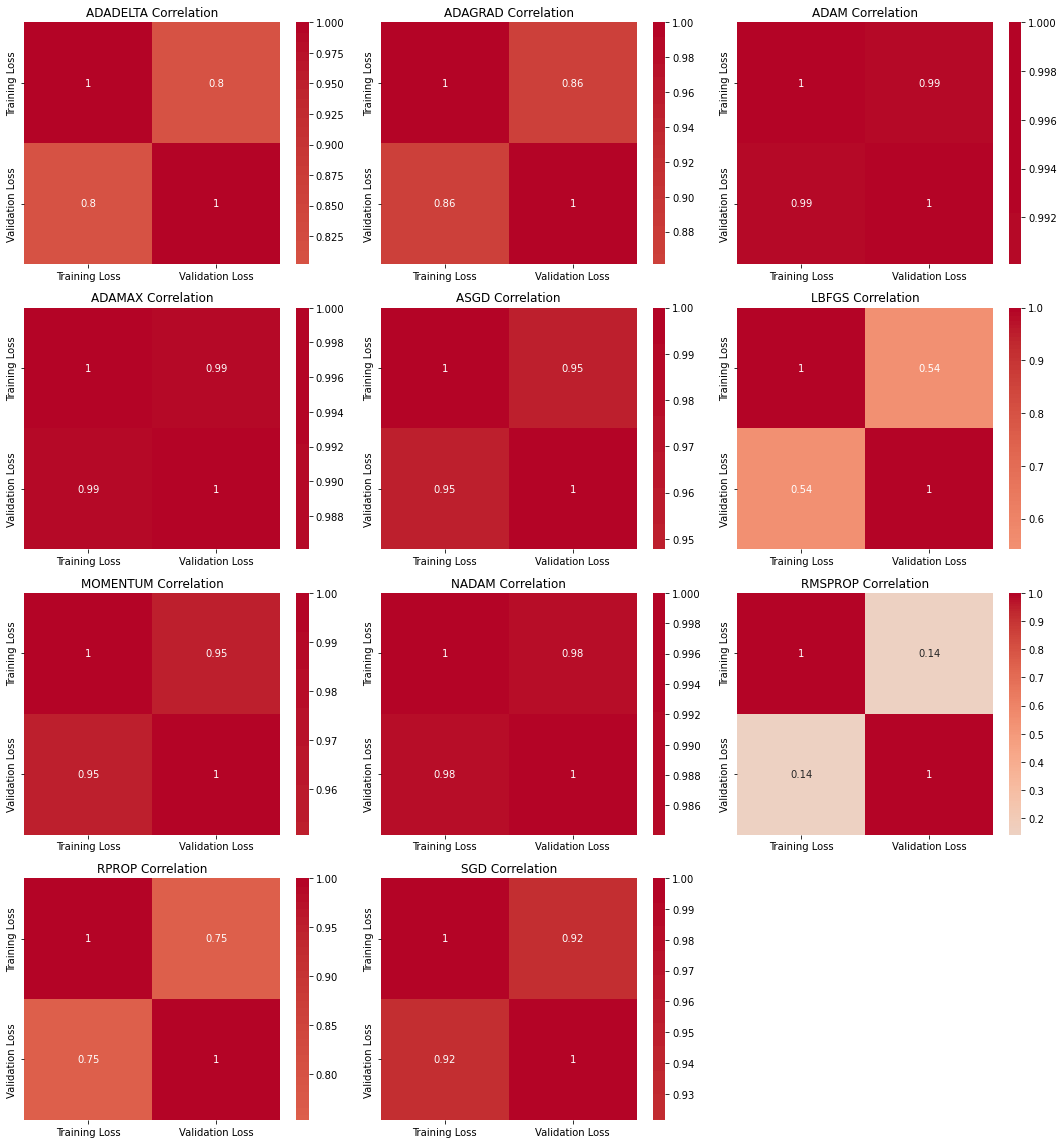

In [31]:
# Plotting the overall correlation
plt.figure(figsize=(6, 5))
sns.heatmap(overall_corr, annot=True, cmap='coolwarm', center=0)
plt.title('Overall Correlation between Training and Validation Loss')
plt.show()

# Getting the unique optimizers for subplot dimensions
unique_optimizers = combined_df['Optimizer'].unique()
n_optimizers = len(unique_optimizers)

# Calculating subplot grid dimensions
n_cols = 3  # for example, adjust as necessary
n_rows = -(-n_optimizers // n_cols)  # Ceiling division to get row count

# Plotting correlations by optimizer
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))
axes = axes.flatten()

for i, optimizer in enumerate(unique_optimizers):
    # Subset the DataFrame for the current optimizer and calculate correlation
    optimizer_corr = combined_df[combined_df['Optimizer'] == optimizer][["Training Loss", "Validation Loss"]].corr()
    
    # Plotting the heatmap
    sns.heatmap(optimizer_corr, annot=True, cmap='coolwarm', center=0, ax=axes[i])
    axes[i].set_title(f'{optimizer} Correlation')

# Adjusting layout and handling case where there might be empty subplots
for j in range(i + 1, n_cols * n_rows):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Let's assume 'optimizer_dataframes' is a dictionary with optimizer names as keys and their corresponding DataFrames as values.

for name, df in combined_df.items():
    print(f"Optimizer: {name}")
    
    # Descriptive Statistics
    print(df[['Training Loss', 'Validation Loss']].describe())
    
    # Correlation
    correlation = df[['Training Loss', 'Validation Loss']].corr()
    print("Correlation matrix:\n", correlation)
    
    # Loss Distributions
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Training Loss'], kde=True)
    plt.title(f"{name} Training Loss Distribution")
    
    plt.subplot(1, 2, 2)
    sns.histplot(df['Validation Loss'], kde=True)
    plt.title(f"{name} Validation Loss Distribution")
    plt.show()
    
    # Loss Over Epochs
    plt.figure(figsize=(12, 5))
    plt.plot(df['Training Loss'], label='Training Loss')
    plt.plot(df['Validation Loss'], label='Validation Loss')
    plt.title(f"{name} Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    # Scatter Plot with Fit Line
    sns.lmplot(x='Training Loss', y='Validation Loss', data=df, line_kws={'color': 'red'})
    plt.title(f"{name} Training vs Validation Loss")
    plt.show()
    
    # Calculate Pearson Correlation
    corr, _ = pearsonr(df['Training Loss'], df['Validation Loss'])
    print(f"Pearson Correlation: {corr}")

Optimizer: Batch


KeyError: "None of [Index(['Training Loss', 'Validation Loss'], dtype='object')] are in the [index]"

In [53]:
combined_df

,Batch,Episode,PTO Damping,Reward,Training Loss,Validation Loss,Optimizer
0,0,0,1.896552e+06,0.000000,7.661373,14.923682,ADADELTA
1,0,1,1.000000e+06,0.707726,13.787034,3.166393,ADADELTA
2,0,2,1.724138e+06,0.552479,6.150092,6.190107,ADADELTA
3,0,3,1.000000e+06,0.691177,3.874322,2.049308,ADADELTA
4,0,4,1.482759e+06,0.205747,3.167641,1.304566,ADADELTA
...,...,...,...,...,...,...,...
17595,39,1595,1.827586e+06,0.411597,0.374278,0.888951,SGD
17596,39,1596,1.827586e+06,0.411763,0.399204,1.486719,SGD
17597,39,1597,1.827586e+06,0.411928,0.060639,0.360424,SGD
17598,39,1598,1.827586e+06,0.412093,2.621458,0.332994,SGD


In [54]:
# Ensure the correct data types, if necessary
combined_df['Training Loss'] = combined_df['Training Loss'].astype(float)
combined_df['Validation Loss'] = combined_df['Validation Loss'].astype(float)

# Descriptive Statistics for the entire DataFrame
print("Descriptive Statistics for the entire DataFrame:")
print(combined_df.describe())

# Correlation analysis for the entire DataFrame
print("\nCorrelation between Training Loss and Validation Loss for the entire DataFrame:")
print(combined_df[['Training Loss', 'Validation Loss']].corr())

# Group by optimizer and then perform the descriptive statistics and correlation
grouped = combined_df.groupby('Optimizer')
for name, group in grouped:
    print(f"\nOptimizer: {name}")
    print("Descriptive Statistics:")
    print(group[['Training Loss', 'Validation Loss']].describe())
    
    print(f"Correlation between Training Loss and Validation Loss for {name}:")
    print(group[['Training Loss', 'Validation Loss']].corr())


Descriptive Statistics for the entire DataFrame:
              Batch       Episode   PTO Damping        Reward  Training Loss  \
count  17600.000000  17600.000000  1.760000e+04  17600.000000   17600.000000   
mean      19.500000    799.500000  1.697410e+06      0.859042       3.163725   
std       11.543724    461.893247  2.873548e+05      1.112995       7.645977   
min        0.000000      0.000000  1.000000e+06      0.000000       0.000006   
25%        9.750000    399.750000  1.551724e+06      0.182052       0.114859   
50%       19.500000    799.500000  1.827586e+06      0.407782       0.505912   
75%       29.250000   1199.250000  1.931034e+06      1.043734       2.230615   
max       39.000000   1599.000000  2.000000e+06     13.311122     359.049561   

       Validation Loss  
count     1.760000e+04  
mean      3.168767e+00  
std       8.572170e+00  
min       4.592293e-07  
25%       1.128660e-01  
50%       5.009426e-01  
75%       2.249163e+00  
max       6.504346e+02  

Corr

In [58]:
combined_df.items()

<generator object DataFrame.items at 0x7fd5e0b886d0>

In [59]:
for column_name, series in combined_df.items():
    print(f"Column: {column_name}")
    print(series, end="\n\n")

Column: Batch
0         0
1         0
2         0
3         0
4         0
         ..
17595    39
17596    39
17597    39
17598    39
17599    39
Name: Batch, Length: 17600, dtype: int64

Column: Episode
0           0
1           1
2           2
3           3
4           4
         ... 
17595    1595
17596    1596
17597    1597
17598    1598
17599    1599
Name: Episode, Length: 17600, dtype: int64

Column: PTO Damping
0        1.896552e+06
1        1.000000e+06
2        1.724138e+06
3        1.000000e+06
4        1.482759e+06
             ...     
17595    1.827586e+06
17596    1.827586e+06
17597    1.827586e+06
17598    1.827586e+06
17599    1.827586e+06
Name: PTO Damping, Length: 17600, dtype: float64

Column: Reward
0        0.000000
1        0.707726
2        0.552479
3        0.691177
4        0.205747
           ...   
17595    0.411597
17596    0.411763
17597    0.411928
17598    0.412093
17599    0.412258
Name: Reward, Length: 17600, dtype: float64

Column: Training Loss
0     

In [60]:
optimizer_means = combined_df.groupby('Optimizer')[['Training Loss', 'Validation Loss']].mean()
print(optimizer_means)

           Training Loss  Validation Loss
Optimizer                                
ADADELTA        5.628092         5.678259
ADAGRAD         1.140150         1.079016
ADAM            1.278852         1.256349
ADAMAX          1.605038         1.589563
ASGD            1.777352         1.740424
LBFGS          15.752506        15.863457
MOMENTUM        1.100721         1.101648
NADAM           1.831696         1.815989
RMSPROP         1.134125         1.253747
RPROP           1.226665         1.165622
SGD             2.325781         2.312368


In [63]:
for name, df in combined_df.items():
    print(f"Optimizer: {name}")
    
    # Descriptive Statistics
    print(df[['Training Loss', 'Validation Loss']].describe())
    
    # Correlation
    correlation = df[['Training Loss', 'Validation Loss']].corr()
    print("Correlation matrix:\n", correlation)
    
    # Loss Distributions
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Training Loss'], kde=True)
    plt.title(f"{name} Training Loss Distribution")
    
    plt.subplot(1, 2, 2)
    sns.histplot(df['Validation Loss'], kde=True)
    plt.title(f"{name} Validation Loss Distribution")
    plt.show()
    
    # Loss Over Epochs
    plt.figure(figsize=(12, 5))
    plt.plot(df['Training Loss'], label='Training Loss')
    plt.plot(df['Validation Loss'], label='Validation Loss')
    plt.title(f"{name} Loss Over Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    
    # Scatter Plot with Fit Line
    sns.lmplot(x='Training Loss', y='Validation Loss', data=df, line_kws={'color': 'red'})
    plt.title(f"{name} Training vs Validation Loss")
    plt.show()
    
    # Calculate Pearson Correlation
    corr, _ = pearsonr(df['Training Loss'], df['Validation Loss'])
    print(f"Pearson Correlation: {corr}")

Optimizer: Batch


KeyError: "None of [Index(['Training Loss', 'Validation Loss'], dtype='object')] are in the [index]"

In [66]:
print(combined_df.columns)

Index(['Batch', 'Episode', 'PTO Damping', 'Reward', 'Training Loss',
       'Validation Loss', 'Optimizer'],
      dtype='object')


In [65]:
print(combined_df[['Training Loss', 'Validation Loss']].describe())

       Training Loss  Validation Loss
count   17600.000000     1.760000e+04
mean        3.163725     3.168767e+00
std         7.645977     8.572170e+00
min         0.000006     4.592293e-07
25%         0.114859     1.128660e-01
50%         0.505912     5.009426e-01
75%         2.230615     2.249163e+00
max       359.049561     6.504346e+02


In [67]:
print(type(combined_df))

<class 'pandas.core.frame.DataFrame'>


In [68]:
for optimizer in combined_df['Optimizer'].unique():
    optimizer_data = combined_df[combined_df['Optimizer'] == optimizer]
    print(f"Optimizer: {optimizer}")
    print(optimizer_data[['Training Loss', 'Validation Loss']].describe())
    print(optimizer_data[['Training Loss', 'Validation Loss']].corr())


Optimizer: ADADELTA
       Training Loss  Validation Loss
count    1600.000000      1600.000000
mean        5.628092         5.678259
std         6.633020         6.887923
min         0.017031         0.058137
25%         1.918766         2.077936
50%         3.533366         3.723327
75%         6.759035         6.690409
max        68.543015        76.450439
                 Training Loss  Validation Loss
Training Loss         1.000000         0.802346
Validation Loss       0.802346         1.000000
Optimizer: ADAGRAD
       Training Loss  Validation Loss
count    1600.000000      1600.000000
mean        1.140150         1.079016
std         2.744308         2.640470
min         0.000304         0.002793
25%         0.247822         0.233521
50%         0.545417         0.523290
75%         1.074689         1.044426
max        56.151184        63.416260
                 Training Loss  Validation Loss
Training Loss         1.000000         0.861495
Validation Loss       0.861495       

In [69]:
combined_df

,Batch,Episode,PTO Damping,Reward,Training Loss,Validation Loss,Optimizer
0,0,0,1.896552e+06,0.000000,7.661373,14.923682,ADADELTA
1,0,1,1.000000e+06,0.707726,13.787034,3.166393,ADADELTA
2,0,2,1.724138e+06,0.552479,6.150092,6.190107,ADADELTA
3,0,3,1.000000e+06,0.691177,3.874322,2.049308,ADADELTA
4,0,4,1.482759e+06,0.205747,3.167641,1.304566,ADADELTA
...,...,...,...,...,...,...,...
17595,39,1595,1.827586e+06,0.411597,0.374278,0.888951,SGD
17596,39,1596,1.827586e+06,0.411763,0.399204,1.486719,SGD
17597,39,1597,1.827586e+06,0.411928,0.060639,0.360424,SGD
17598,39,1598,1.827586e+06,0.412093,2.621458,0.332994,SGD


## Regression Analysis and Cross Validation

In [83]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer, mean_squared_error, r2_score

# Assuming 'combined_df' is your DataFrame loaded here

# List of unique optimizers
optimizers = combined_df['Optimizer'].unique()

# Results DataFrame to store summary stats
results = pd.DataFrame()

for optimizer in optimizers:
    print(f"Processing {optimizer}...")
    # Filter the DataFrame for the current optimizer
    df = combined_df[combined_df['Optimizer'] == optimizer]
    
    # Predictor variables and response variable
    X = df[['Batch', 'Episode', 'PTO Damping']]
    y = df['Training Loss']

    # Add a constant to the model (for the intercept)
    X_const = sm.add_constant(X)

    # Fit the regression model using Statsmodels
    model = sm.OLS(y, X_const).fit()
    
    # Print the summary of the regression model
    print(model.summary())

    # Set up the random forest regressor
    rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

    # Perform 5-fold cross-validation using negative mean squared error as the scoring method
    mse_scores = cross_val_score(rf_model, X, y, cv=5, scoring='neg_mean_squared_error')
    # Convert scores to positive mean squared error
    mse_scores = -mse_scores
    
    # Calculate R^2 scores for comparison
    r2_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

    # Store results
    results = results.append({
        'Optimizer': optimizer,
        'MSE Scores Mean': mse_scores.mean(),
        'MSE Scores Std': mse_scores.std(),
        'R^2 Scores Mean': r2_scores.mean(),
        'R^2 Scores Std': r2_scores.std()
    }, ignore_index=True)

    # Print cross-validation results
    print(f"Cross-validated MSE scores for {optimizer}: {mse_scores}")
    print(f"Cross-validated R^2 scores for {optimizer}: {r2_scores}")

# Display all results
print(results)

Processing ADADELTA...
                            OLS Regression Results                            
Dep. Variable:          Training Loss   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.715
Date:                Sat, 13 Apr 2024   Prob (F-statistic):              0.162
Time:                        10:34:30   Log-Likelihood:                -5294.5
No. Observations:                1600   AIC:                         1.060e+04
Df Residuals:                    1596   BIC:                         1.062e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.2081     

## Confidence Intervals

In [87]:
# Group by 'Optimizer' and calculate confidence intervals
results = {}
for name, group in combined_df.groupby('Optimizer'):
    mean = group['Training Loss'].mean()
    std_err = stats.sem(group['Training Loss'])
    ci = stats.t.interval(0.95, len(group['Training Loss'])-1, loc=mean, scale=std_err)
    results[name] = {'Mean Training Loss': mean, '95% CI': ci}

# Display results
for optimizer, result in results.items():
    print(f"> {optimizer}: Mean Training Loss = {result['Mean Training Loss']:.4f}, 95% CI = {result['95% CI']}")

> ADADELTA: Mean Training Loss = 5.6281, 95% CI = (5.302833383864481, 5.953349773857052)
> ADAGRAD: Mean Training Loss = 1.1402, 95% CI = (1.0055799335395328, 1.2747208688519334)
> ADAM: Mean Training Loss = 1.2789, 95% CI = (1.1276983865638641, 1.4300056548518767)
> ADAMAX: Mean Training Loss = 1.6050, 95% CI = (1.3903082437711092, 1.819767306000391)
> ASGD: Mean Training Loss = 1.7774, 95% CI = (1.597160974400618, 1.9575438405443801)
> LBFGS: Mean Training Loss = 15.7525, 95% CI = (15.057324162001388, 16.447688819419927)
> MOMENTUM: Mean Training Loss = 1.1007, 95% CI = (0.9432103497016913, 1.2582324962220475)
> NADAM: Mean Training Loss = 1.8317, 95% CI = (1.5842984927385924, 2.0790937021051006)
> RMSPROP: Mean Training Loss = 1.1341, 95% CI = (0.6583545470416019, 1.6098952890680058)
> RPROP: Mean Training Loss = 1.2267, 95% CI = (1.1008859302104657, 1.3524449511002195)
> SGD: Mean Training Loss = 2.3258, 95% CI = (2.1011703189155067, 2.5503914029219907)


In [88]:
# Group by 'Optimizer' and calculate confidence intervals
results2 = {}
for name, group in combined_df.groupby('Optimizer'):
    mean = group['Validation Loss'].mean()
    std_err = stats.sem(group['Validation Loss'])
    ci = stats.t.interval(0.95, len(group['Validation Loss'])-1, loc=mean, scale=std_err)
    results2[name] = {'Mean Validation Loss': mean, '95% CI': ci}

# Display results
for optimizer, result in results2.items():
    print(f"> {optimizer}: Mean Validation Loss = {result['Mean Validation Loss']:.4f}, 95% CI = {result['95% CI']}")

> ADADELTA: Mean Validation Loss = 5.6783, 95% CI = (5.340501496985395, 6.016016858278002)
> ADAGRAD: Mean Validation Loss = 1.0790, 95% CI = (0.9495371394278316, 1.2084944193164284)
> ADAM: Mean Validation Loss = 1.2563, 95% CI = (1.1066858066803054, 1.4060114860354958)
> ADAMAX: Mean Validation Loss = 1.5896, 95% CI = (1.3769179294031855, 1.8022072906162283)
> ASGD: Mean Validation Loss = 1.7404, 95% CI = (1.5710442746147848, 1.9098044063327442)
> LBFGS: Mean Validation Loss = 15.8635, 95% CI = (15.200308362458987, 16.526606465821)
> MOMENTUM: Mean Validation Loss = 1.1016, 95% CI = (0.938568891189387, 1.2647271416560775)
> NADAM: Mean Validation Loss = 1.8160, 95% CI = (1.564308948832715, 2.0676687315269078)
> RMSPROP: Mean Validation Loss = 1.2537, 95% CI = (0.44376249649452515, 2.063731932680542)
> RPROP: Mean Validation Loss = 1.1656, 95% CI = (1.0522062576144022, 1.2790370374001716)
> SGD: Mean Validation Loss = 2.3124, 95% CI = (2.086817104596904, 2.537919517366771)


In [89]:
# Group by 'Optimizer' and calculate confidence intervals
results3 = {}
for name, group in combined_df.groupby('Optimizer'):
    mean = group['Reward'].mean()
    std_err = stats.sem(group['Reward'])
    ci = stats.t.interval(0.95, len(group['Reward'])-1, loc=mean, scale=std_err)
    results3[name] = {'Mean Reward': mean, '95% CI': ci}

# Display results
for optimizer, result in results3.items():
    print(f"> {optimizer}: Mean Reward = {result['Mean Reward']:.4f}, 95% CI = {result['95% CI']}")

> ADADELTA: Mean Reward = 1.0434, 95% CI = (0.9839068229349986, 1.102839431459791)
> ADAGRAD: Mean Reward = 0.7970, 95% CI = (0.7519759999521876, 0.8420636671961552)
> ADAM: Mean Reward = 0.8201, 95% CI = (0.7666650308836978, 0.8735298418360367)
> ADAMAX: Mean Reward = 0.8771, 95% CI = (0.8199433724152383, 0.9342204187197152)
> ASGD: Mean Reward = 0.9747, 95% CI = (0.9193812959726508, 1.0300551127630446)
> LBFGS: Mean Reward = 0.6589, 95% CI = (0.6103728894305678, 0.7074626118679164)
> MOMENTUM: Mean Reward = 0.8643, 95% CI = (0.811716885215859, 0.9168607340544584)
> NADAM: Mean Reward = 0.9430, 95% CI = (0.8800870028353317, 1.0058229133963246)
> RMSPROP: Mean Reward = 0.7414, 95% CI = (0.6910867162220458, 0.7916661163991234)
> RPROP: Mean Reward = 0.8781, 95% CI = (0.8210383780625907, 0.9352325301174929)
> SGD: Mean Reward = 0.8515, 95% CI = (0.7976509281563102, 0.9053430344075182)
